In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifie
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# ----------------------------------------------- Import data --------------------------------------------

df = pd.read_csv('./resources/data.csv', index_col=0)

/root/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# ------------------------------------------ Remove unnecessary columns -----------------------------------

# Remove id column and use a default index
df.reset_index(drop=True, inplace=True)

df.drop(columns = [
        'member_id',
        'grade',
        'emp_title',
        'pymnt_plan',
        'desc',
        'title',
        'zip_code',
        'initial_list_status',
        'out_prncp_inv',
        'total_pymnt_inv',
        'funded_amnt_inv',
        'total_rec_prncp',
        'total_rec_int',
        'total_rec_late_fee',
        'collection_recovery_fee',
        'last_pymnt_d',
        'last_pymnt_amnt',
        'next_pymnt_d',
        'last_credit_pull_d',
        'collections_12_mths_ex_med',
        'mths_since_last_major_derog',
        'policy_code',
        'application_type',
        'annual_inc_joint',
        'dti_joint',
        'verification_status_joint',
        'open_acc_6m',
        'open_il_6m',
        'open_il_12m',
        'open_il_24m',
        'mths_since_rcnt_il',
        'total_bal_il',
        'il_util',
        'open_rv_12m',
        'open_rv_24m',
        'max_bal_bc',
        'all_util',
        'inq_fi',
        'total_cu_tl',
        'inq_last_12m'
        ], inplace = True)

In [3]:
# ------------------------------------------------- Normalization ----------------------------------------

# Remove "months" in column "term"
df.term = df.term.str.split().str[0]

# Rename column "sub_grade" to "grade"
df.rename(columns={'sub_grade':'grade'}, inplace = True)

# Normalize emp_length
def normalize_emp_length(emp_length):
    if (emp_length == None or (not type(emp_length) is str)):
        return
    if (emp_length == '< 1 year'):
        return '0'
    elif (emp_length == '10+ years'):
        return '10'
    else:
        return emp_length.split()[0]

df.emp_length = df.emp_length.apply(normalize_emp_length)

df.emp_length = pd.to_numeric(df.emp_length, downcast='integer') # TODO: fix the conversion (current -> float64, desired -> int8)

# df['emp_length'] = df['emp_length'].apply(lambda x: int(x) if not np.isnan(x) else x)
# df['emp_length'] = df['emp_length'].astype(str).astype(int)

# Convert types
df.loan_amnt = df.loan_amnt.astype('uint32')
df.funded_amnt = df.funded_amnt.astype('uint32')
df.term = df.term.astype('uint8')
df.int_rate = df.int_rate.astype('float16')
df.installment = df.installment.astype('float16')
df.grade = df.grade.astype('category')

df.emp_length = df.emp_length.astype('UInt8')
df.mths_since_last_delinq = df.mths_since_last_delinq.astype('UInt8')
df.mths_since_last_record = df.mths_since_last_record.astype('UInt8')

df.home_ownership = df.home_ownership.astype('category')
df.annual_inc = df.annual_inc.astype('uint32')
df.verification_status = df.verification_status.astype('category')
df.purpose = df.purpose.astype('category')
df.addr_state = df.addr_state.astype('category')
df.dti = df.dti.astype('float16')
df.delinq_2yrs = df.delinq_2yrs.astype('uint8')
df.inq_last_6mths = df.inq_last_6mths.astype('uint8')
df.open_acc = df.open_acc.astype('uint8')
df.pub_rec = df.pub_rec.astype('uint8')
df.revol_bal = df.revol_bal.astype('uint32')
df.revol_util = df.revol_util.astype('float16')
df.total_acc = df.total_acc.astype('uint8')
df.out_prncp = df.out_prncp.astype('float16')
df.total_pymnt = df.total_pymnt.astype('float16')
df.recoveries = df.recoveries.astype('float16')
df.acc_now_delinq = df.acc_now_delinq.astype('category')
df.tot_coll_amt = df.tot_coll_amt.astype('float16')
df.tot_cur_bal = df.tot_cur_bal.astype('float16')
df.total_rev_hi_lim = df.total_rev_hi_lim.astype('float16')
df.default_ind = df.default_ind.astype('bool')

df.issue_d = df.issue_d.astype('datetime64')
df.earliest_cr_line = df.earliest_cr_line.astype('datetime64')
df['since_first_cr'] = ((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'M')).astype('uint16')

df.drop(columns = [
        'issue_d',
        'earliest_cr_line'
        ], inplace = True)


#imputer = KNNImputer(n_neighbors=2)
#newDf = imputer.fit_transform(df[['emp_length']])

#print(newDf)



# Decision Tree Classifier

In [4]:
dtc = DecisionTreeClassifier()

feature_cols = ['annual_inc']
X = df[feature_cols] # Features
y = df['default_ind'].values

(training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, test_size=0.25)

dtc.fit(training_inputs, training_classes)

prediction_classes = dtc.predict(testing_inputs)

# with open('credit.dot', 'w') as out_file:
#    out_file = tree.export_graphviz(dtc, out_file=out_file)
    
# tree.plot_tree(dtc)

print("Confusion matrix:\n", metrics.confusion_matrix(testing_classes, prediction_classes))
print("Accuracy:",metrics.accuracy_score(testing_classes, prediction_classes))
print("Precision:", metrics.precision_score(testing_classes, prediction_classes, average='weighted'))

Confusion matrix:
 [[201831    640]
 [ 11476     46]]
Accuracy: 0.9433813255573781
Precision: 0.8988639501367787


<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

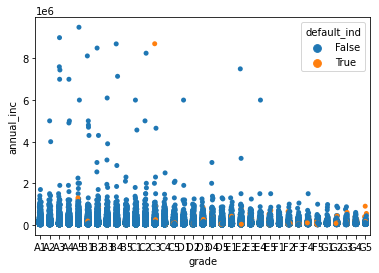

In [9]:
sb.stripplot(x='grade', y='annual_inc', hue='default_ind', data=df)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

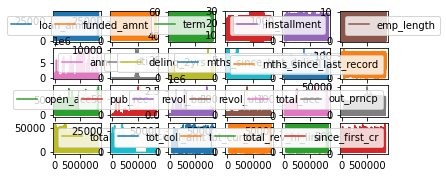

In [12]:
df.plot(subplots=True, layout=(6,6))

In [ ]:
print(df.info())
# print(df)